In [555]:
import torch 
import pandas as pd
from torch.utils.data import random_split,DataLoader,TensorDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## Problema 1

In [556]:
dataset = pd.read_csv("dataset.csv")
dataset.drop("#",axis=1,inplace=True)
dataset

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Descripción del dataset  
En el siguiente bloque describa el dataset a utilizar. También es necesario hacer un análisis exploratorio de los datos.
Responda como mínimo las siguientes preguntas:
- ¿De qué trata el dataset?
- ¿Cuáles son las clases de salida?
- ¿Está preparado para poder ser introducido a una red neuronal?
- ¿Cuantas carácteristicas tiene?
- Etc.


In [557]:
dataset.describe()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Descripción del dataset
El dataset trata de datos de pokemon, el el cual se tiene informacion de su: nombre, , tipo de pokemon, hp, ataque, defensa, ataque especial, defensa especial, velocidadgeneracion y si es legendario o no, siendo estala clase de salida.

### Preparación del dataset
El dataset no esta preparado para ser ingresado a una red neuronal, existen datos nulos y datos que no son numericos ,estos no son bien manejados por las redes neuronales, para lo cual se necesita elimninar la columna nombre yaque esta no entrega valor al datset para clasificar, se hace un hot-encodign a las columnas "Type 1" y "Type 2" para que puedan ser manejadas por la red neuronal

In [558]:
# Verificar valores nulos en el dataset
print(dataset.isnull().sum())

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [559]:
# Eliminacion de columnas que no aportan,mas cambiar los tipos a mas columnas para que sean usados por el modelo
nombres = dataset['Name'].values # guardar los nombres de los pokemons

dataset = dataset.drop(columns=['Name','Total']) 
# El nombre de los pokemons se elimina ya, no aporta
# y el total tampoco aporta, ya que es la suma de los stats, y esto suele sobreajustar debido a la informacion redundante

# convertir las columnas de typos en a columnas separadas y entonces los nulos quedran como 0 o false
dataset["Type 2"] = dataset["Type 2"].fillna("None") # para dejar una columa type 2_none ya que hay pokemons que no tienen tipo 2 pero todos tienen tipo 1
dataset=pd.get_dummies(dataset,columns=["Type 1","Type 2"], dummy_na= True) # convertir a columnas separadas los type1 y type2 
dataset.head()



dataset = dataset.drop(columns=['Type 1_nan', 'Type 2_nan']) # eliminar las columnas que no aportan nada, 

# Verificar valores nulos en el dataset
print(dataset.isnull().sum())

dataset.describe()

X = dataset.drop(columns=['Legendary']) # eliminar la columna Legendary para que no se use como input
## Guaramos los nombres de las columnas que son numéricas y las que no,para escalar solo lo numerico y no lo dummies 
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
other_cols = [c for c in X.columns if c not in num_cols]
Y = dataset['Legendary'] # la columna Legendary es la que queremos predecir

HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary          0
Type 1_Bug         0
Type 1_Dark        0
Type 1_Dragon      0
Type 1_Electric    0
Type 1_Fairy       0
Type 1_Fighting    0
Type 1_Fire        0
Type 1_Flying      0
Type 1_Ghost       0
Type 1_Grass       0
Type 1_Ground      0
Type 1_Ice         0
Type 1_Normal      0
Type 1_Poison      0
Type 1_Psychic     0
Type 1_Rock        0
Type 1_Steel       0
Type 1_Water       0
Type 2_Bug         0
Type 2_Dark        0
Type 2_Dragon      0
Type 2_Electric    0
Type 2_Fairy       0
Type 2_Fighting    0
Type 2_Fire        0
Type 2_Flying      0
Type 2_Ghost       0
Type 2_Grass       0
Type 2_Ground      0
Type 2_Ice         0
Type 2_None        0
Type 2_Normal      0
Type 2_Poison      0
Type 2_Psychic     0
Type 2_Rock        0
Type 2_Steel       0
Type 2_Water       0
dtype: int64


### Preparación del dataset  
En el siguiente bloque realice la preparación del dataset. Esto incluye:
- Paso a tensores de PyTorch
- División del dataset en train y test
- Carga de los datos en DataLoader
- Otros pasos que considere necesarios

In [560]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Escalado de los datos    

scaler_ae = StandardScaler()
X_num_scaled = scaler_ae.fit_transform(X[num_cols])

# Reconstruye el DataFrame combinado
X_complete_scaled = X.copy()  # Copia el DataFrame original
X_complete_scaled[num_cols] = X_num_scaled  # Reemplaza las columnas numéricas y mantiene los dummies 

X_complete_scaled = X_complete_scaled.astype(float)  # Asegurarse de que todas las columnas son numéricas
X_complete_scaled = X_complete_scaled.to_numpy()  # Convertir a numpy array


# División del dataset en conjunto de entrenamiento y prueba
# 60% entrenamiento, 40% test
X_train, X_test, Y_train, Y_test = train_test_split(X_complete_scaled, Y, test_size=0.4, random_state=42, stratify=Y)

In [561]:

# Convertir a tensores de PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
Y_train_t = torch.tensor(Y_train.values, dtype=torch.int64)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
Y_test_t = torch.tensor(Y_test.values, dtype=torch.int64)



In [562]:
# Crear TensorDataset y DataLoader para entrenamiento y test
Batch_size = 32  # Tamaño del batch
train_dataset = TensorDataset(X_train_t, Y_train_t)
test_dataset = TensorDataset(X_test_t, Y_test_t)
train_loader = DataLoader(train_dataset, batch_size=Batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=Batch_size, shuffle=False)

### Implementación de la red neuronal
En el siguiente bloque implemente la arquitectura de red neuronal que predecirá si un Pokémon es legendario o no.

In [563]:
import torch.nn as nn

En el siguiente bloque cree una instancia de la red neuronal y defina la función de pérdida y el optimizador. Justifique la elección de la función de pérdida y el optimizador.

In [564]:
import torch.nn.functional as F

class PokemonNet(nn.Module):
    def __init__(self, input_dim,output_dim=2):
        super(PokemonNet, self).__init__()
        hidden_dim =  input_dim//2        # Capa de entrada       
        self.fc1 = nn.Linear(input_dim, hidden_dim)     # 43 -> 21
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        
        ## Dropout, es una técnica de regularización(reglas o castigos a la red)
        ## que ayuda a prevenir el sobreajuste, apaga algunas neuronas
        ## Segun la probabilidad que se le pase
        
        self.dropout1 = nn.Dropout(0.1) 
        
        # Segunda capa (reducción gradual de la primera)
        hidden_dim2 = hidden_dim // 2                   # 21 -> 10
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(0.1)
        
        hidden_dim3 = hidden_dim2 // 2                   # 10 -> 5
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.bn3 = nn.BatchNorm1d(hidden_dim3)
        self.dropout3 = nn.Dropout(0.1)        
        # Capa de salida
        self.out = nn.Linear(hidden_dim3, output_dim)   #  # 5 -> 2 (Legendary o no Legendary)
    def forward(self, x):
        # Primera capa 
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        # Segunda capa (reducción gradual)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        # Tercera capa (reducción gradual)
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        
        
        # Capa de salida (sin activación para CrossEntropyLoss)
        logits = self.out(x)
        return logits
    

En el siguiente bloque entrene la red neuronal.

In [565]:
input_dim = X_train_t.shape[1]          # cantidad de features
model = PokemonNet(input_dim,output_dim=2)  # 2 clases: Legendary y No Legendary

# 1. Definir función de pérdida
# usare CrossEntropyLoss, yaque
# es la mas adecuada para clasificación multiclase y ademas la mas usada.

criterion = nn.CrossEntropyLoss()    

# 2. Definir optimizador y tasa de aprendizaje 
# Usaremos Adam, que es un optimizador adaptativo
# ayuda a converger mas rapido que SGD y ademas combina
# las ventajas de RMSProp y AdaGrad. por lo que es muy usado
# y es una buena opción para la mayoría de los problemas.

lering_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lering_rate)

# 3. entrenamiento del modelo
## Guardar epocas y sus perdidas
epochs = []
losses = []

def train_model(model, train_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(1, num_epochs+1):
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.float()
            yb = yb.long()  
            optimizer.zero_grad() # Reinica los gradientes
            preds = model(xb) # predicciones [clase 0 = no legendary, clase 1 = legendary]
            loss = criterion(preds, yb)  # Calcula la pérdida 
            loss.backward() # backpropagation y guardar los gradientes
            optimizer.step() # Ajusta los parametros del modelo
            running_loss += loss.item() * xb.size(0)
        # Guardar la perdida de la epoca
        epochs.append(epoch)
        epoch_loss = running_loss / len(train_loader.dataset) # type: ignore
        losses.append(epoch_loss)
        print(f"Epoch {epoch:02d} — Loss: {epoch_loss:.4f}")

# entrenamiento del modelo
train_model(model, train_loader, criterion, optimizer, num_epochs=100)

Epoch 01 — Loss: 0.5855
Epoch 02 — Loss: 0.4838
Epoch 03 — Loss: 0.4417
Epoch 04 — Loss: 0.4159
Epoch 05 — Loss: 0.3731
Epoch 06 — Loss: 0.3580
Epoch 07 — Loss: 0.3296
Epoch 08 — Loss: 0.2981
Epoch 09 — Loss: 0.2796
Epoch 10 — Loss: 0.2690
Epoch 11 — Loss: 0.2615
Epoch 12 — Loss: 0.2407
Epoch 13 — Loss: 0.2246
Epoch 14 — Loss: 0.2174
Epoch 15 — Loss: 0.2289
Epoch 16 — Loss: 0.2055
Epoch 17 — Loss: 0.1832
Epoch 18 — Loss: 0.1860
Epoch 19 — Loss: 0.1758
Epoch 20 — Loss: 0.1767
Epoch 21 — Loss: 0.1777
Epoch 22 — Loss: 0.1454
Epoch 23 — Loss: 0.1639
Epoch 24 — Loss: 0.1438
Epoch 25 — Loss: 0.1312
Epoch 26 — Loss: 0.1320
Epoch 27 — Loss: 0.1448
Epoch 28 — Loss: 0.1360
Epoch 29 — Loss: 0.1140
Epoch 30 — Loss: 0.1334
Epoch 31 — Loss: 0.1193
Epoch 32 — Loss: 0.1232
Epoch 33 — Loss: 0.1231
Epoch 34 — Loss: 0.1063
Epoch 35 — Loss: 0.1057
Epoch 36 — Loss: 0.1169
Epoch 37 — Loss: 0.1097
Epoch 38 — Loss: 0.0938
Epoch 39 — Loss: 0.0898
Epoch 40 — Loss: 0.1043
Epoch 41 — Loss: 0.0917
Epoch 42 — Loss:

En el siguiente bloque evalue el rendimiento de la red (Métricas de evaluación, matriz de confusión, etc.) y responda las siguientes preguntas:
- ¿Cuántas épocas fueron necesarias para converger?
- ¿Cuál fue la precisión final?
- ¿El entrenamiento de su red neuronal fue exitoso?
- ¿Cuales son los ejemplos que más confunde a la red neuronal? Responda el porqué de acuerdo a su conocimiento del dataset.




Reporte de clasificación:
               precision    recall  f1-score   support

No Legendary     0.9565    0.9728    0.9646       294
   Legendary     0.6190    0.5000    0.5532        26

    accuracy                         0.9344       320
   macro avg     0.7878    0.7364    0.7589       320
weighted avg     0.9291    0.9344    0.9312       320

Precisión (accuracy): 0.934375


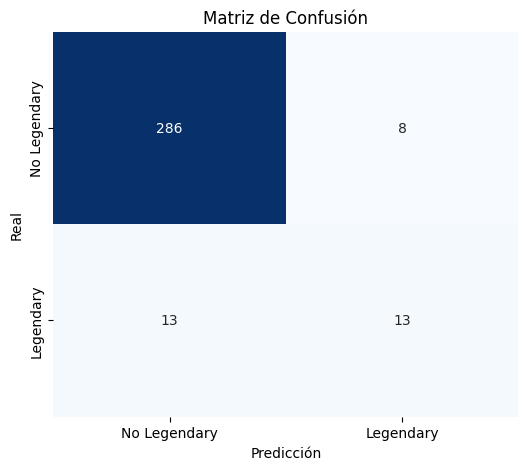

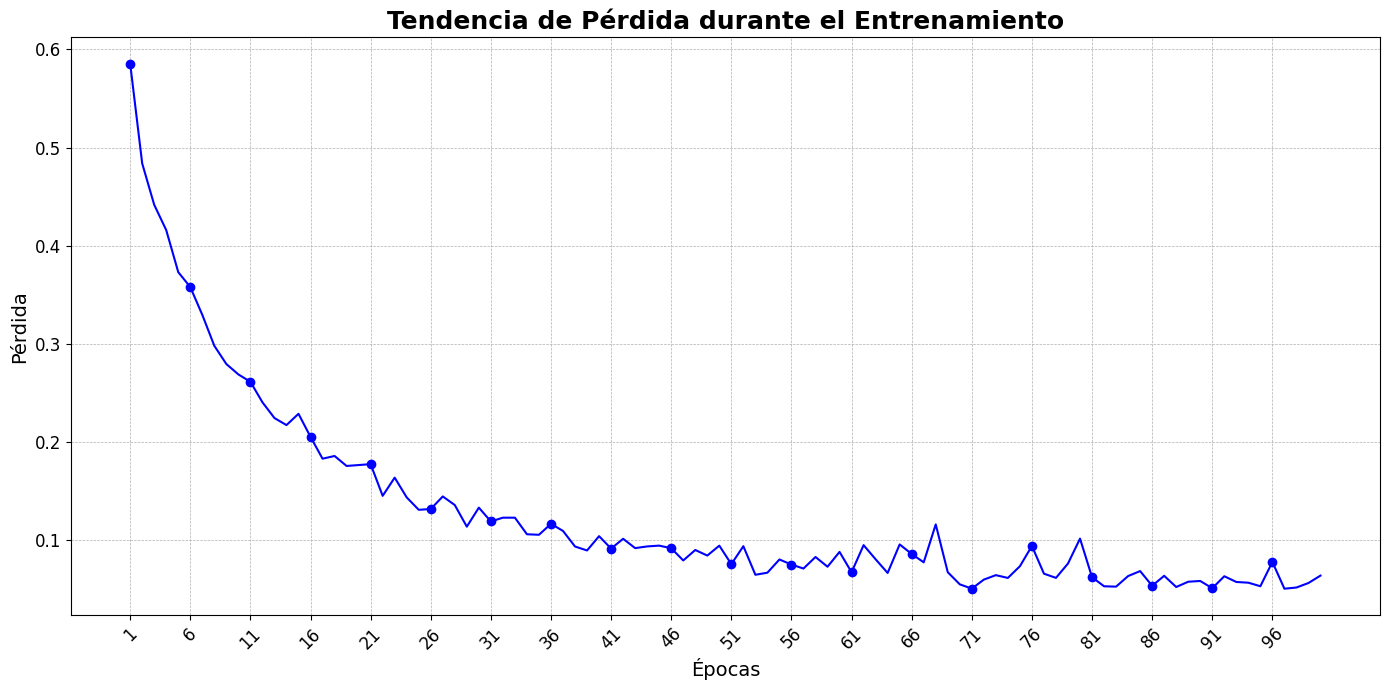


Pokémon clasificados como Falsos Negativos (Legendary reales, predichos como No Legendary):
                  Nombre   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
221            Dunsparce  100      70       70       65       65     45   
483             Skuntank  103      93       67       71       61     84   
58               Persian   65      70       60       65       65    115   
474              Buneary   55      66       44       44       56     85   
787  GourgeistSuper Size   85     100      122       58       75     54   
596            Palpitoad   75      65       55       65       55     69   
95                Grimer   80      80       50       40       50     25   
669              Lampent   60      40       60       95       60     55   
431    DeoxysSpeed Forme   50      95       90       95       90    180   
471              Ambipom   75     100       66       60       66    115   
604           Whirlipede   40      55       99       40       79     47   
520    

In [566]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de test_loader
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.float()
        yb = yb.long()
        preds = model(xb)  # Predicciones del modelo
        _, predicted = torch.max(preds, 1)  # Obtener la clase con mayor probabilidad
        y_true.extend(yb.numpy())  # Guardar las etiquetas verdaderas
        y_pred.extend(predicted.numpy())  # Guardar las predicciones

# Guardar los índices de los falsos negativos (FN: y_true=1, y_pred=0)
y_true_arr = np.array(y_true)
y_pred_arr = np.array(y_pred)
fn_idx = np.where((y_true_arr == 1) & (y_pred_arr == 0))[0]
# falsos positivos (FP: y_true=0, y_pred=1)
fp_idx = np.where((y_true_arr == 0) & (y_pred_arr == 1))[0]

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
# Otras métricas
# Cambiar etiquetas para que 1 sea "Legendary" y 0 "No Legendary" en el reporte
target_names = ['No Legendary', 'Legendary']
print("\nReporte de clasificación:\n", classification_report(y_true, y_pred, target_names=target_names, digits=4))
print("Precisión (accuracy):", accuracy_score(y_true, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Tendencia de pérdida (sin imprimir cada época, solo mostrar el gráfico)
plt.figure(figsize=(14, 7))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b', markevery=5)
plt.title('Tendencia de Pérdida durante el Entrenamiento', fontsize=18, fontweight='bold')
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Pérdida', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Espaciar las épocas en el eje x (cada 5 si hay muchas)
if len(epochs) > 20:
    step = max(1, len(epochs)//20)
    plt.xticks(np.arange(min(epochs), max(epochs)+1, step))
else:
    plt.xticks(epochs)
plt.tick_params(axis='x', labelrotation=45)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


# Imprimir los Pokémon que fueron clasificados incorrectamente
# Obtener los índices originales del dataset para los ejemplos de test

test_indices = X_test.shape[0]

# Para obtener los índices originales del dataset, necesitamos los índices usados por train_test_split
# Por defecto, train_test_split desordena los datos, así que necesitamos reconstruir los índices originales

# Volver a ejecutar solo para obtener los índices de test (no afecta a los datos ya cargados)
_, X_test_idx = train_test_split(
    np.arange(len(dataset)), test_size=0.4, random_state=4, stratify=dataset["Legendary"].astype(int)
)
fn_df = dataset.iloc[X_test_idx[fn_idx]].copy()  # Falsos Negativos
fp_df = dataset.iloc[X_test_idx[fp_idx]].copy()  # Falsos Positivos


# Eliminar las columnas que fueron divididas
def mostrar_types_true(df):   
    # Seleccionar solo columnas de Type 1 y Type 2
    type_cols = [col for col in df.columns if col.startswith('Type 1_') or col.startswith('Type 2_')]
    # Para cada fila, mostrar solo los tipos donde el valor es True
    types_true = []
    for _, row in df[type_cols].iterrows():
        tipos = [col.replace('Type 1_', '').replace('Type 2_', '') for col, val in row.items() if val]
        types_true.append(', '.join(tipos))
    return types_true

# Definir las columnas principales a mostrar (todas menos 'Legendary')
main_cols = [col for col in dataset.columns if col != 'Legendary']
main_cols_no_legendary = [col for col in main_cols if col != 'Legendary']

# Falsos Negativos
print("\nPokémon clasificados como Falsos Negativos (Legendary reales, predichos como No Legendary):")
fn_df_main = fn_df[main_cols_no_legendary].copy()
fn_df_main['Nombre'] = nombres[fn_df.index]
fn_types = mostrar_types_true(fn_df)
fn_df_main['Tipos'] = fn_types
print(fn_df_main[['Nombre'] + main_cols_no_legendary + ['Tipos']])

# Falsos Positivos
print("\nPokémon clasificados como Falsos Positivos (No Legendary reales, predichos como Legendary):")
fp_df_main = fp_df[main_cols_no_legendary].copy()
fp_df_main['Nombre'] = nombres[fp_df.index]
fp_types = mostrar_types_true(fp_df)
fp_df_main['Tipos'] = fp_types
print(fp_df_main[['Nombre'] + main_cols_no_legendary + ['Tipos']])


### r:


### - ¿Cuántas épocas fueron necesarias para converger?
    Como se puede observar en el gráfico de la función de pérdida, la red neuronal converge luego de 40 épocas, ya que a partir de ese punto la función de pérdida deja de disminuir significativamente y se estabiliza, aunque se pueden observar fluctuaciones por lo que se puede considerar implementar un early stopping para evitar el sobreajuste.
### - ¿Cuál fue la precisión final?
    La precisión final del modelo es de aproximadamente 0.93
### - ¿El entrenamiento de su red neuronal fue exitoso?
    Sí, el entrenamiento de la red neuronal fue exitoso, ya que se logró una alta precisión en la clasificación,aunque existen algunas confusiones en la clasificación de ciertos Pokémon dadas las metricas recall el 97% de los no legendarios fueron bien clasificados, mientras que el 50% de los legendarios fueron bien clasificados, esto puede deberse a que segun support hay un desbalance entre las clases, ya que hay muchos más Pokémon no legendarios que legendarios en el dataset, lo que puede hacer que la red neuronal se enfoque más en clasificar correctamente los no legendarios.
### - ¿Cuales son los ejemplos que más confunde a la red neuronal? Responda el porqué de acuerdo a su conocimiento del dataset.
    Los ejemplos que más confunden a la red neuronal son aquellos Pokémon que tienen características similares a los Pokémon legendarios, pero que no son legendarios. Esto puede deberse a que algunos Pokémon no legendarios tienen estadísticas altas o habilidades especiales que los hacen parecerse a los legendarios, lo que dificulta la clasificación correcta por parte del modelo.

### Conclusiones
En el siguiente bloque escriba sus conclusiones sobre el trabajo realizado. Además responda las siguientes preguntas:
- Sobre la matriz de confusión, si usted fuese un entrenador Pokémon ¿Elegiría a Pokémon ubicados en FP o FN para su equipo? ¿Por qué?
  - Elegiria Pokémon ubicados en FP (Falsos Positivos) para el equipo, ya que estos son Pokémon que el modelo clasificó como legendarios pero que en realidad no lo son. Esto puede ser ventajoso porque estos Pokémon pueden tener estadísticas altas y habilidades especiales, lo que los hace útiles en combate, a pesar de no ser legendarios.
- Entrene un modelo de aprendizaje automático diferente al de la red neuronal (eg. RF) y compare los resultados. ¿Cuál fue el mejor modelo? ¿Por qué?

Precisión RF: 0.934375

Reporte de clasificación RF:
               precision    recall  f1-score   support

No Legendary     0.9417    0.9898    0.9652       294
   Legendary     0.7273    0.3077    0.4324        26

    accuracy                         0.9344       320
   macro avg     0.8345    0.6487    0.6988       320
weighted avg     0.9243    0.9344    0.9219       320



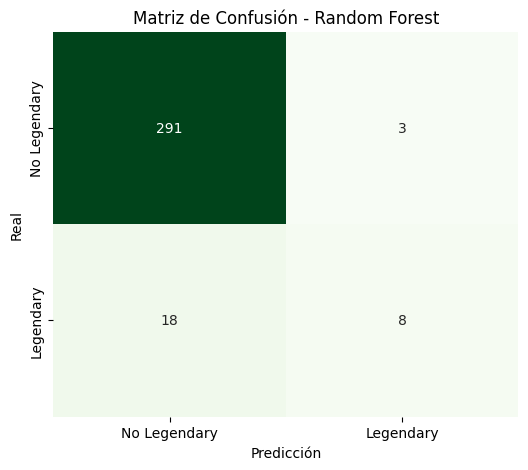

In [567]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predicciones en test
rf_pred = rf.predict(X_test)

# Resultados
print("Precisión RF:", accuracy_score(Y_test, rf_pred))
print("\nReporte de clasificación RF:\n", classification_report(Y_test, rf_pred, target_names=target_names, digits=4))

# Matriz de confusión
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(Y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

### Tabla de Acurracy y métricas de evaluación

#### Accuracy
| NN  | RF  |
| :---------: | :-----: | 
|**0.9344** | **0.9344** |


#### Metricas de evaluación


| modelo - Metrica / Clase | **No Legendary**  | **Legendary** |
| :--------------: | :---------------: | :-----------: |
| NN - Precision | 0.9565    |0.6190    |
|NN - Recall | 0.9728  |0.5000  | 
|NN - F1-Score |  0.9646   | 0.5532   |
|RF - Precision |  0.9417    | 0.7273    | 
|RF - Recall | 0.9898  | 0.3077  | 
|RF - F1-Score | 0.9652  |  0.4324   |
|Support | 294   |   26   |

Actualmente, la red nueronial (NN) supera al modelo de Random Forest (RF) en la mayoría de las métricas, especialmente en precisión y F1-score para la clase "Legendary". Esto sugiere que la red neuronal es más efectiva para identificar Pokémon legendarios, mientras que el modelo RF tiene un esta tarea específica. Sin embargo, ambos modelos muestran un buen rendimizento general, con una alta precisión y recall para la clase "NoLegendary".



## Problema 2

### Representaciones internas a partir de datos sin etiquetar  
En esta sección se trabajará con un enfoque diferente al utilizado previamente. Ahora no se utilizarán etiquetas para guiar el aprendizaje del modelo. En su lugar, el objetivo será encontrar una forma eficiente de representar cada instancia del dataset en un espacio de menor dimensión.

Diseñe un modelo que reduzca la dimensionalidad de los datos, y entrene dicho modelo utilizando el conjunto completo. Luego, visualice la representación de los datos en dos dimensiones. Para el resto siga un esquema similar al del problema anterior.

Responda las siguientes preguntas:
- ¿Se observan agrupaciones o patrones en la representación obtenida?
- ¿Es posible distinguir algún tipo de separación visual al colorear los puntos según si un Pokémon es legendario o no?
- ¿Qué interpretación podrías darle a la distribución resultante?
- ¿Sus resultados tienen alguna relación con el problema anterior?

R: 
**Para este problema, se utilizará un modelo de autoencoder (Undercomplete Autoencoder) para reducir la dimensionalidad del dataset**

In [588]:
# Preparacion de los datos para el autoencoder - SIN etiquetas
# pasar datafram X a numpy array y luego a tensor

# Pasa a tensor
X_complete = torch.tensor(X_complete_scaled, dtype=torch.float32)


Y_np = Y.to_numpy()  # Convertir DataFrame a numpy array
Y_complete = torch.from_numpy(Y_np) # y para las visualizaciones
complete_dataset = torch.utils.data.TensorDataset(X_complete) 
complete_loader = torch.utils.data.DataLoader(complete_dataset, batch_size=32, shuffle=True) # crea el DataLoader

In [589]:
## Creacion Autoencoder
class PokemonAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=2):
        super(PokemonAutoencoder, self).__init__()
        
        print(f"Diseñando autoencoder para {input_dim} features de entrada...")

        # Definir las dimensiones de las capas ocultas, teniendo en cuenta que el datset esta limpio mas arriba
        hidden1 = input_dim // 2          # aprox 22
        hidden2 = hidden1 // 2             # aprox 11
        hidden3 = max(hidden2 // 2, 4)     # aprox 6
        # reduccion progresiva de las dimensiones para evitar sobreajuste y mejorar la compresion 
        print(f"Arquitectura: {input_dim} -> {hidden1} -> {hidden2} -> {hidden3} -> {latent_dim}")
        
        # ENCODER: Compresión progresiva
        # ocupa batch para estabilizar el entrenamiento
        self.encoder = nn.Sequential(
            # Primera compresión: mantiene la mayoría de información
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.BatchNorm1d(hidden1),
            nn.Dropout(0.1),  # Dropout más bajo
            
            # Segunda compresión: extrae patrones importantes
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden2),
            nn.Dropout(0.1),  # Dropout más bajo
            
            # Tercera compresión: características esenciales
            nn.Linear(hidden2, hidden3),
            nn.ReLU(),
            # Espacio latente: representación más compacta
            nn.Linear(hidden3, latent_dim)
        )
        
        # DECODER: Reconstrucción simétrica
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden3),
            nn.ReLU(),
            
            nn.Linear(hidden3, hidden2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden2),
            nn.Dropout(0.1),
            
            nn.Linear(hidden2, hidden1),
            nn.ReLU(),
            nn.BatchNorm1d(hidden1),
            nn.Dropout(0.1),  # Dropout más bajo
            
            # Reconstrucción final (sin activación para valores continuos)
            nn.Linear(hidden1, input_dim)
        )
            
    def forward(self, x):
        latent = self.encoder(x)
        reconstruction = self.decoder(latent)
        return reconstruction, latent

input_dim = X_train_t.shape[1]  # cantidad de features
model_ae = PokemonAutoencoder(input_dim, latent_dim=2)  # Definir el modelo con 64 neuronas en la capa oculta

Diseñando autoencoder para 44 features de entrada...
Arquitectura: 44 -> 22 -> 11 -> 5 -> 2


In [590]:
## Entremamiento
criterion_ae = nn.MSELoss()  # Usar MSE para autoencoders
optimizer_ae = torch.optim.Adam(model_ae.parameters(), lr=1e-3)
## craear DataLoader para el autoencoder

losses = []
def train_ae(model, data_loader, criterion, optimizer, num_epochs=100):
    losses = []
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_data in data_loader:
            x = batch_data[0]  # Solo características (sin etiquetas)
            optimizer.zero_grad()
            reconstructed, _ = model(x) 
            loss = criterion(reconstructed, x)  # Comparar reconstrucción vs original
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(data_loader)
        losses.append(avg_loss)
        
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
    
# entrenar
train_ae(model_ae, complete_loader, criterion_ae, optimizer_ae, num_epochs=100)

Epoch [1/100], Loss: 0.434246
Epoch [2/100], Loss: 0.312872
Epoch [3/100], Loss: 0.262486
Epoch [4/100], Loss: 0.232043
Epoch [5/100], Loss: 0.217017
Epoch [6/100], Loss: 0.202623
Epoch [7/100], Loss: 0.191801
Epoch [8/100], Loss: 0.179579
Epoch [9/100], Loss: 0.176065
Epoch [10/100], Loss: 0.173078
Epoch [11/100], Loss: 0.165503
Epoch [12/100], Loss: 0.161983
Epoch [13/100], Loss: 0.156164
Epoch [14/100], Loss: 0.156642
Epoch [15/100], Loss: 0.152337
Epoch [16/100], Loss: 0.151434
Epoch [17/100], Loss: 0.149185
Epoch [18/100], Loss: 0.146717
Epoch [19/100], Loss: 0.143287
Epoch [20/100], Loss: 0.142824
Epoch [21/100], Loss: 0.140624
Epoch [22/100], Loss: 0.139500
Epoch [23/100], Loss: 0.138025
Epoch [24/100], Loss: 0.137196
Epoch [25/100], Loss: 0.136777
Epoch [26/100], Loss: 0.135488
Epoch [27/100], Loss: 0.135382
Epoch [28/100], Loss: 0.134457
Epoch [29/100], Loss: 0.131700
Epoch [30/100], Loss: 0.132235
Epoch [31/100], Loss: 0.131748
Epoch [32/100], Loss: 0.130414
Epoch [33/100], L


Top 5 correlaciones con Dim1:
Sp. Atk    0.768155
Speed      0.767356
Attack     0.578270
Sp. Def    0.478803
HP         0.478579
Name: Dim1, dtype: float64

Top 5 correlaciones con Dim2:
Sp. Atk    0.770375
Sp. Def    0.722466
Attack     0.706934
HP         0.596549
Speed      0.583040
Name: Dim2, dtype: float64


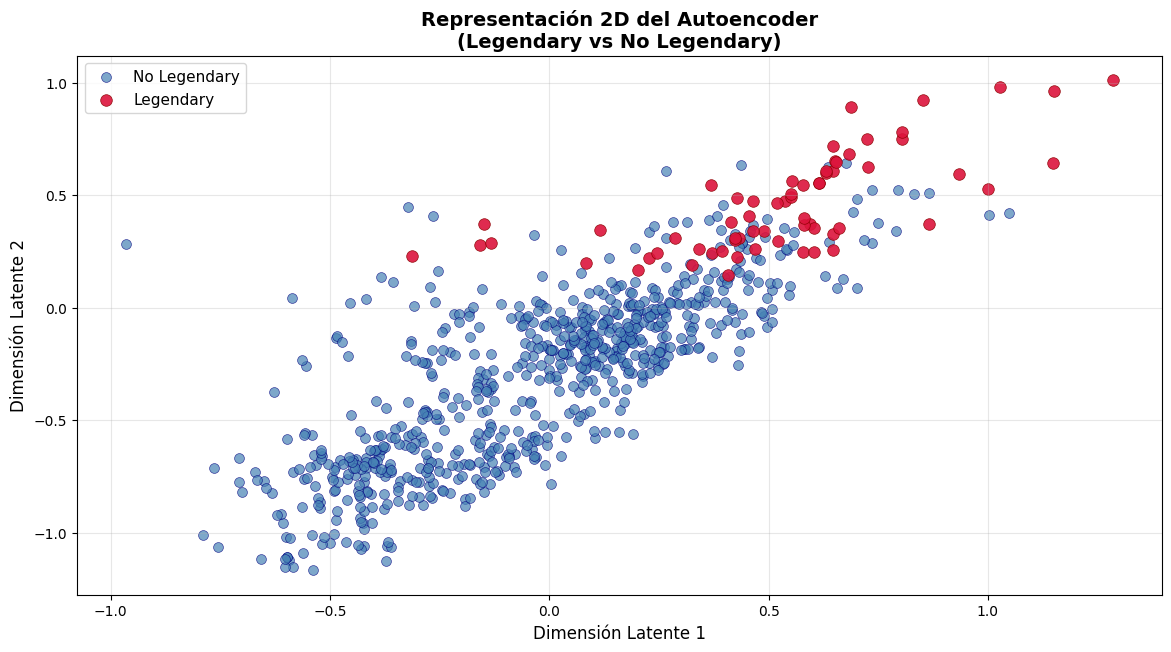

In [591]:
# Visualización de la representación 2D del autoencoder
model_ae.eval()
with torch.no_grad():
    # Pasar todos los datos por el autoencoder
    reconstructed, encoded_2d = model_ae(X_complete)
    encoded_2d = encoded_2d.numpy()
    reconstructed = reconstructed.numpy()
    
# Preparar máscaras para colorear
legendary_mask = Y_complete.numpy() == 1

plt.figure(figsize=(14, 7))
plt.scatter(encoded_2d[~legendary_mask, 0], encoded_2d[~legendary_mask, 1], 
           c='steelblue', alpha=0.7, s=50, label='No Legendary', 
           edgecolors='navy', linewidth=0.5)
plt.scatter(encoded_2d[legendary_mask, 0], encoded_2d[legendary_mask, 1], 
           c='crimson', alpha=0.9, s=70, label='Legendary', 
           edgecolors='darkred', linewidth=0.5)

plt.title('Representación 2D del Autoencoder\n(Legendary vs No Legendary)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Dimensión Latente 1', fontsize=12)
plt.ylabel('Dimensión Latente 2', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)



# 1. Toma tu X_scaled (numpy array de forma [n,43]) y tus nombres de columna
feature_names = X.columns.tolist()

# 2. Crea un DataFrame de las features escaladas
X_scaled_df = pd.DataFrame(X_complete_scaled, columns=feature_names)

# 3. Crea un DataFrame de la representación latente
Z_df = pd.DataFrame(encoded_2d, columns=['Dim1','Dim2'])

# 4. Junta ambos y computa la correlación
full_df = pd.concat([Z_df, X_scaled_df.reset_index(drop=True)], axis=1)
corr = full_df.corr()

# 5. Extrae y ordena las 5 features más correlacionadas (en valor absoluto) con cada dimensión
for dim in ['Dim1','Dim2']:
    top5 = (corr.loc[dim, feature_names]
            .abs()
            .sort_values(ascending=False)
            .head(5))
    print(f"\nTop 5 correlaciones con {dim}:")
    print(top5)

